## Load delhi pm2.5 data 

In [7]:
import pandas as pd
pd.set_option('display.max_rows', 3000)
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

raw_excel_data = pd.read_csv('delhi_cleaned.csv')
df_complex=raw_excel_data.copy()
df_complex.date = pd.to_datetime(df_complex.date,format='%d-%m-%Y %H:%M')
df_complex.set_index("date", inplace=True)
#df= df_complex.asfreq('h')
df=df_complex.copy()

## Smoothing Techniques

In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
%matplotlib inline

trainlen=int(df.pm25.count()*0.8)
testlen=df.pm25.count()-trainlen
train= df.head(trainlen)
test=df.tail(testlen)

from sklearn.metrics import mean_squared_error
def measure_rmse(actual, predicted):
    return np.sqrt(mean_squared_error(actual, predicted))


### Exponetial Smoothing

### Holts-Winter Additive seasonality, additive trend

In [10]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES
model = HWES(train["pm25"], seasonal_periods=24, trend='add', seasonal='add')
fitted = model.fit()
fcast1 = fitted.forecast(524)

rmse_alpha_pointTwo = measure_rmse(test['pm25'], fcast1)
rmse_alpha_pointTwo


C:\Users\Lakshmi K\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


4594.277188473828

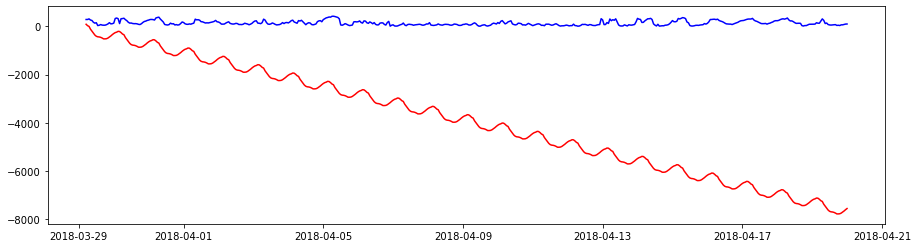

In [11]:
plt.figure(figsize=(15, 4))
plt.plot(test['pm25'],color='blue')
plt.plot(fcast1,color='red')

### Holts-Winter multiplicative seasonality, additive trend

In [12]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES
model = HWES(train["pm25"], seasonal_periods=24, trend='add', seasonal='mul')
fitted = model.fit()
fcast1 = fitted.forecast(524)

rmse_alpha_pointTwo = measure_rmse(test['pm25'], fcast1)
rmse_alpha_pointTwo


C:\Users\Lakshmi K\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


496.1210061404368

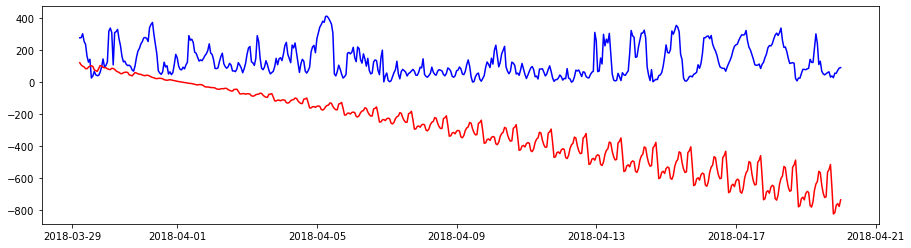

In [13]:
plt.figure(figsize=(15, 4))
plt.plot(test['pm25'],color='blue')
plt.plot(fcast1,color='red')